In [1]:
from __future__ import division
import os
import sys

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
rna = pd.read_csv('../tables/TXT/rnaseq_table.txt', sep='\t')
rna['expression_lfc'] = rna['log2FoldChange']
rna['logBaseMean'] = np.log10(rna['baseMean'])

ribo = pd.read_csv('../tables/TXT/riboseq_table.txt', sep='\t')
ribo['occupancy_lfc'] = ribo['log2FoldChange']
ribo['logBaseMean'] = np.log10(ribo['baseMean'])

te = pd.read_csv('../tables/TXT/te_table.txt', sep='\t')
te['efficiency_lfc'] = te['log2FoldChange']
te['logBaseMean'] = np.log10(te['baseMean'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


In [3]:
## Diff. expression (RNA seq.) 10% FDR
rna10fdr = rna[rna['padj']<0.1].sort_index()
rna10fdr.to_csv('../tables/TXT/rna10fdr_table.txt', sep='\t')
rna10fdr.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,expression_lfc,logBaseMean
YAL003W,7558.808002,0.517269,0.170895,3.026826,2.471359e-03,0.008590,0.517269,3.878453
YAL005C,1938.300151,-0.731109,0.184544,-3.961701,7.441773e-05,0.000411,-0.731109,3.287421
YAL008W,71.354324,-1.181620,0.379051,-3.117312,1.825083e-03,0.006627,-1.181620,1.853420
YAL011W,190.848097,1.091821,0.305492,3.573970,3.516086e-04,0.001613,1.091821,2.280688
YAL019W,302.591384,1.209243,0.226563,5.337331,9.432490e-08,0.000001,1.209243,2.480857


In [4]:
## Diff. occupancy (Ribo. seq.) 10% FDR
ribo10fdr = ribo[ribo['padj']<0.1].sort_index()
ribo10fdr.to_csv('../tables/TXT/ribo10fdr_table.txt', sep='\t')
ribo10fdr.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,occupancy_lfc,logBaseMean
YAL005C,1921.888647,-1.511570,0.259381,-5.827596,5.623157e-09,4.500400e-07,-1.511570,3.283728
YAL022C,40.146487,-1.346517,0.412994,-3.260379,1.112633e-03,1.750064e-02,-1.346517,1.603648
YAL025C,86.808246,1.090675,0.342104,3.188134,1.431939e-03,2.142110e-02,1.090675,1.938561
YAL038W,15917.167848,-0.623785,0.235673,-2.646820,8.125258e-03,7.695757e-02,-0.623785,4.201866
YAL040C,68.644474,2.242700,0.403739,5.554832,2.778790e-08,2.008705e-06,2.242700,1.836606


In [5]:
## Diff. TE (combined) 10% FDR
te10fdr = te[te['padj']<0.1].sort_index()
te10fdr.to_csv('../tables/TXT/te10fdr_table.txt', sep='\t')
te10fdr.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,efficiency_lfc,logBaseMean
YAL021C,207.444038,-0.990604,0.349529,8.014219,0.004641,0.082770,-0.990604,2.316901
YAL023C,810.805017,-1.061169,0.271170,15.237572,0.000095,0.005923,-1.061169,2.908916
YAL035W,1211.125162,-1.508834,0.495704,9.169508,0.002461,0.055763,-1.508834,3.083189
YAL062W,39.901193,2.156978,0.753591,9.186513,0.002438,0.055686,2.156978,1.600986
YBL005W,77.482314,1.496243,0.513561,8.816865,0.002985,0.063129,1.496243,1.889203


In [6]:
def plot_ma(data, ax=None, low_lfc=-3, high_lfc=3, p_thres=0.1, title=None):
    if not ax:
        ax = plt.gca()
    
    ## Get points that fall in range
    base = data[data['log2FoldChange'].between(low_lfc,high_lfc)]
    baseNotSig = base[base['padj']>=p_thres]
    baseSig = base[base['padj']<p_thres]
    
    ## Get points out of range
    low = data[data['log2FoldChange']<low_lfc]
    lowNotSig = low[low['padj']>=p_thres]
    lowSig = low[low['padj']<p_thres]
    
    high = data[data['log2FoldChange']>high_lfc]
    highNotSig = high[high['padj']>=p_thres]
    highSig = high[high['padj']<p_thres]
    
    ## Plot
    ax.scatter(baseNotSig['logBaseMean'], baseNotSig['log2FoldChange'], edgecolor='none', c='k', s=5)
    ax.scatter(baseSig['logBaseMean'], baseSig['log2FoldChange'], edgecolor='none', c='r', s=5)
    
    ax.scatter(lowNotSig['logBaseMean'], np.maximum(low_lfc, lowNotSig['log2FoldChange']), edgecolor='k', marker='v', c='none', s=20)
    ax.scatter(lowSig['logBaseMean'], np.maximum(low_lfc, lowSig['log2FoldChange']), edgecolor='r', marker='v', c='none', s=20)
    
    ax.scatter(highNotSig['logBaseMean'], np.minimum(high_lfc, highNotSig['log2FoldChange']), edgecolor='k', marker='^', c='none', s=20)
    ax.scatter(highSig['logBaseMean'], np.minimum(high_lfc, highSig['log2FoldChange']), edgecolor='r', marker='^', c='none', s=20)
    
    ax.axhline(0, linewidth=3, c='r', alpha=0.5, zorder=6)
    
    ax.set_xlim(-1,5)
    ax.set_ylim(low_lfc-0.2,high_lfc+0.2)
    
    xticks = ax.get_xticks()
    ax.set_xticklabels(['10$^{%d}$' % int(x) for x in xticks])
    
    ax.set_xlabel('Mean of normalized counts')
    ax.set_ylabel('log$_{2}$ fold change\n($\it{S.paradoxus}$ : $\it{S.cerevisiae}$)')
    if title:
        ax.set_title(title)

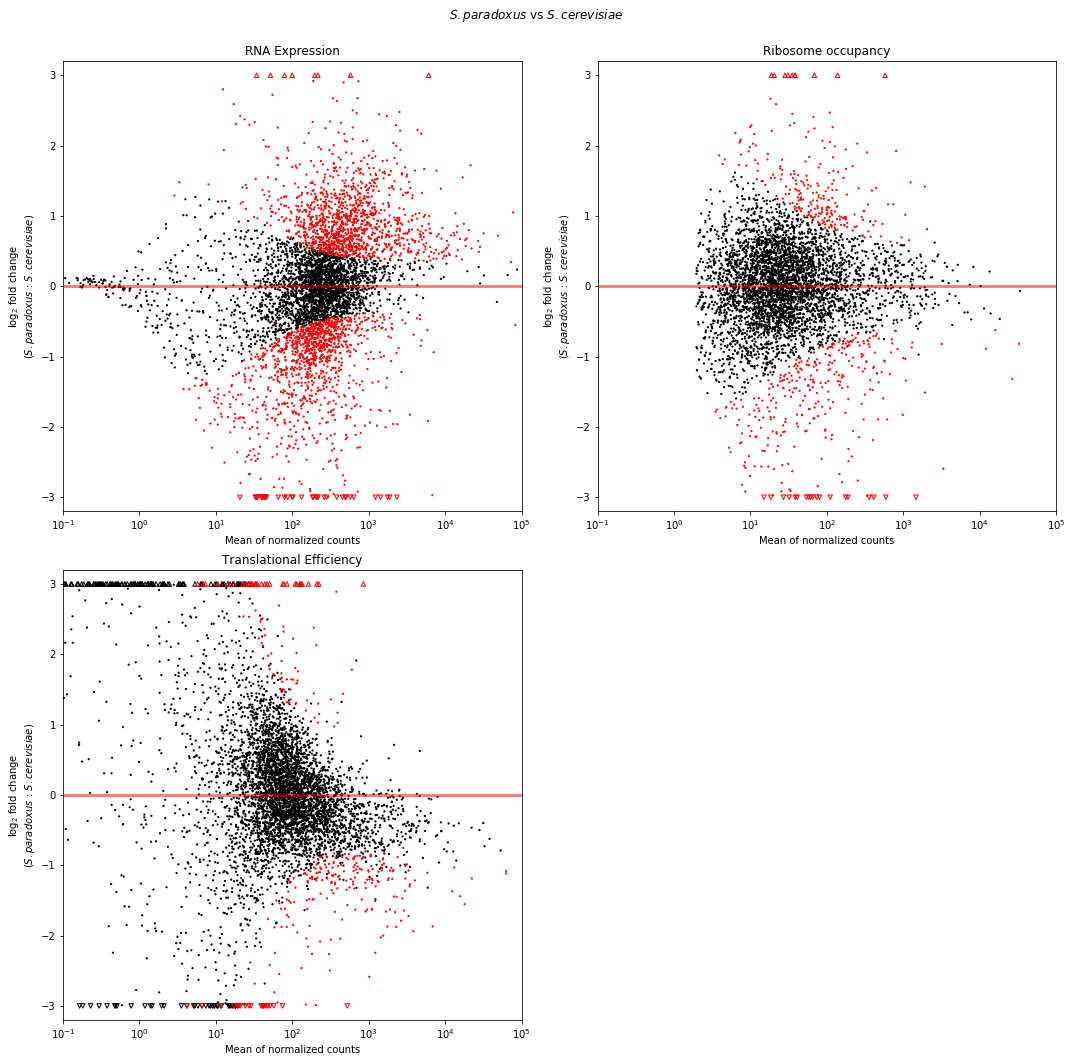

In [7]:
data = [rna,ribo,te]
titles = ['RNA Expression', 'Ribosome occupancy', 'Translational Efficiency']

fig,axesArray = plt.subplots(2,2, figsize=(15,15), facecolor='#FFFFFF')
axes = np.ndarray.flatten(axesArray)

for i,(df,title) in enumerate(zip(data,titles)):
    plot_ma(df, ax=axes[i], title=title)

for ax in axes[len(data):]:
    ax.axis('off')
    
fig.suptitle(r'$\it{S.paradoxus}$ vs $\it{S.cerevisiae}$')
plt.tight_layout()
plt.subplots_adjust(top=0.93)

In [8]:
## Summarize types of evolution
comb = rna[['expression_lfc']].join(te[['efficiency_lfc']])
comb.head()

,expression_lfc,efficiency_lfc
YAL001C,0.133499,-0.660486
YAL002W,-0.337477,0.367534
YAL003W,0.517269,-0.373894
YAL005C,-0.731109,-0.808701
YAL007C,0.039403,-0.362617


In [9]:
combSig = rna[rna['padj']<0.1][['expression_lfc']].join(te[te['padj']<0.1][['efficiency_lfc']], how='inner')
combSig.head()

,expression_lfc,efficiency_lfc
YAL021C,1.248770,-0.990604
YAL023C,0.604339,-1.061169
YAL035W,1.608707,-1.508834
YBL005W,-1.192274,1.496243
YBL017C,0.716205,-1.150379


In [10]:
def get_direction(row):
    if row['expression_lfc'] > 0:
        exp = 'Increase'
    elif row['expression_lfc'] < 0:
        exp = 'Decrease'
    else:
        exp = 'No change'
    
    if row['efficiency_lfc'] > 0:
        eff = 'Increase'
    elif row['efficiency_lfc'] < 0:
        eff = 'Decrease'
    else:
        eff = 'No change'
    
    return (exp,eff)

In [11]:
comb['d_expression'],comb['d_efficiency'] = zip(*comb.apply(get_direction, axis=1))

In [12]:
comb.to_csv('../tables/TXT/type_of_evolution-ALL.txt', sep='\t')

In [13]:
combSig['d_expression'],combSig['d_efficiency'] = zip(*combSig.apply(get_direction, axis=1))

In [14]:
combSig.to_csv('../tables/TXT/type_of_evolution-SIGNIFICANT.txt', sep='\t')

In [15]:
comb.groupby(['d_expression','d_efficiency']).size()

d_expression  d_efficiency
Decrease      Decrease        1029
              Increase        1706
Increase      Decrease        1813
              Increase         888
No change     No change         38
dtype: int64

In [16]:
combSig.groupby(['d_expression','d_efficiency']).size()

d_expression  d_efficiency
Decrease      Decrease         27
              Increase         47
Increase      Decrease        168
              Increase         15
dtype: int64

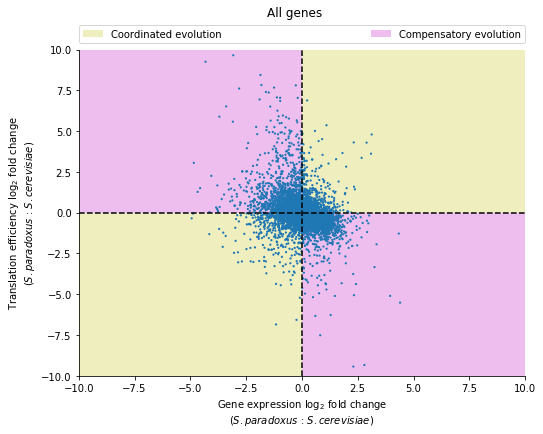

In [17]:
fig,ax = plt.subplots(1,1, figsize=(8,6), facecolor='#FFFFFF')

ax.set_xlim(-10,10)
ax.set_ylim(-10, 10)

# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Gene expression log$_{2}$ fold change\n($\it{S.paradoxus}$ : $\it{S.cerevisiae}$)')
ax.set_ylabel('Translation efficiency log$_{2}$ fold change\n($\it{S.paradoxus}$ : $\it{S.cerevisiae}$)')

# ax.text(-5,-9, 'Coordinated evolution', ha='center')
# ax.text(5,9, 'Coordinated evolution', ha='center')
# ax.text(-5,9, 'Compensatory evolution', ha='center')
# ax.text(5,-9, 'Compensatory evolution', ha='center')

patches = [
    mpl.patches.Rectangle((-10,-10), 10, 10, facecolor='y', alpha=0.25, zorder=1, label='Coordinated evolution'),
    mpl.patches.Rectangle((0,0), 10, 10, facecolor='y', alpha=0.25, zorder=1),
    mpl.patches.Rectangle((-10,0), 10, 10, facecolor='m', alpha=0.25, zorder=1, label='Compensatory evolution'),
    mpl.patches.Rectangle((0,-10), 10, 10, facecolor='m', alpha=0.25, zorder=1),
]

for p in patches:
    ax.add_patch(p)

ax.scatter(comb['expression_lfc'], comb['efficiency_lfc'], edgecolor='none', s=5, zorder=2, label='_')
ax.axhline(0, c='k', linestyle='--', zorder=3)
ax.axvline(0, c='k', linestyle='--', zorder=3)

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0)

fig.suptitle('All genes')

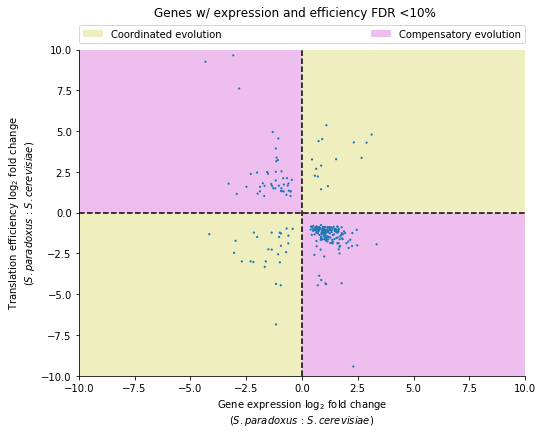

In [18]:
fig,ax = plt.subplots(1,1, figsize=(8,6), facecolor='#FFFFFF')

ax.set_xlim(-10,10)
ax.set_ylim(-10, 10)

# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Gene expression log$_{2}$ fold change\n($\it{S.paradoxus}$ : $\it{S.cerevisiae}$)')
ax.set_ylabel('Translation efficiency log$_{2}$ fold change\n($\it{S.paradoxus}$ : $\it{S.cerevisiae}$)')

# ax.text(-5,-9, 'Coordinated evolution', ha='center')
# ax.text(5,9, 'Coordinated evolution', ha='center')
# ax.text(-5,9, 'Compensatory evolution', ha='center')
# ax.text(5,-9, 'Compensatory evolution', ha='center')

patches = [
    mpl.patches.Rectangle((-10,-10), 10, 10, facecolor='y', alpha=0.25, zorder=1, label='Coordinated evolution'),
    mpl.patches.Rectangle((0,0), 10, 10, facecolor='y', alpha=0.25, zorder=1),
    mpl.patches.Rectangle((-10,0), 10, 10, facecolor='m', alpha=0.25, zorder=1, label='Compensatory evolution'),
    mpl.patches.Rectangle((0,-10), 10, 10, facecolor='m', alpha=0.25, zorder=1),
]

for p in patches:
    ax.add_patch(p)

ax.scatter(combSig['expression_lfc'], combSig['efficiency_lfc'], edgecolor='none', s=5, zorder=2, label='_')
ax.axhline(0, c='k', linestyle='--', zorder=3)
ax.axvline(0, c='k', linestyle='--', zorder=3)

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0)

fig.suptitle('Genes w/ expression and efficiency FDR <10%')

In [20]:
coord,coordUp,coordDown = [],[],[]
comp,compUpDown,compDownUp = [],[],[]

for ix,row in comb.iterrows():
    if (row['d_expression'] == row['d_efficiency']):
        coord.append(row.name)
        if (row['d_expression'] == 'Increase'):
            coordUp.append(row.name)
        else:
            coordDown.append(row.name)
    else:
        comp.append(row.name)
        if (row['d_expression'] == 'Increase'):
            compUpDown.append(row.name)
        else:
            compDownUp.append(row.name)

print "Writing genes [COORDINATED]..."
with open('../gene_lists/all_coordinated_both.txt', 'w') as fh:
    fh.write('\n'.join(coord))
    print '\t{} genes BOTH.'.format(len(coord))
with open('../gene_lists/all_coordinated_up.txt', 'w') as fh:
    fh.write('\n'.join(coordUp))
    print '\t{} genes UP.'.format(len(coordUp))
with open('../gene_lists/all_coordinated_down.txt', 'w') as fh:
    fh.write('\n'.join(coordDown))
    print '\t{} genes DOWN.'.format(len(coordDown))
print

print "Writing genes [COMPENSATORY]..."
with open('../gene_lists/all_compensatory_both.txt', 'w') as fh:
    fh.write('\n'.join(comp))
    print '\t{} genes BOTH.'.format(len(comp))
with open('../gene_lists/all_compensatory_exp-up-te-down.txt', 'w') as fh:
    fh.write('\n'.join(compUpDown))
    print '\t{} genes UP/DOWN'.format(len(compUpDown))
with open('../gene_lists/all_compensatory_exp-down-te-up.txt', 'w') as fh:
    fh.write('\n'.join(compDownUp))
    print '\t{} genes DOWN/UP.'.format(len(compDownUp))

Writing genes [COORDINATED]...
	1955 genes BOTH.
	888 genes UP.
	1067 genes DOWN.

Writing genes [COMPENSATORY]...
	3519 genes BOTH.
	1813 genes UP/DOWN
	1706 genes DOWN/UP.


In [21]:
coord,coordUp,coordDown = [],[],[]
comp,compUpDown,compDownUp = [],[],[]

for ix,row in combSig.iterrows():
    if (row['d_expression'] == row['d_efficiency']):
        coord.append(row.name)
        if (row['d_expression'] == 'Increase'):
            coordUp.append(row.name)
        else:
            coordDown.append(row.name)
    else:
        comp.append(row.name)
        if (row['d_expression'] == 'Increase'):
            compUpDown.append(row.name)
        else:
            compDownUp.append(row.name)

print "Writing genes [COORDINATED]..."
with open('../gene_lists/significant_coordinated_both.txt', 'w') as fh:
    fh.write('\n'.join(coord))
    print '\t{} genes BOTH.'.format(len(coord))
with open('../gene_lists/significant_coordinated_up.txt', 'w') as fh:
    fh.write('\n'.join(coordUp))
    print '\t{} genes UP.'.format(len(coordUp))
with open('../gene_lists/significant_coordinated_down.txt', 'w') as fh:
    fh.write('\n'.join(coordDown))
    print '\t{} genes DOWN.'.format(len(coordDown))
print

print "Writing genes [COMPENSATORY]..."
with open('../gene_lists/significant_compensatory_both.txt', 'w') as fh:
    fh.write('\n'.join(comp))
    print '\t{} genes BOTH.'.format(len(comp))
with open('../gene_lists/significant_compensatory_exp-up-te-down.txt', 'w') as fh:
    fh.write('\n'.join(compUpDown))
    print '\t{} genes UP/DOWN'.format(len(compUpDown))
with open('../gene_lists/significant_compensatory_exp-down-te-up.txt', 'w') as fh:
    fh.write('\n'.join(compDownUp))
    print '\t{} genes DOWN/UP.'.format(len(compDownUp))

Writing genes [COORDINATED]...
	42 genes BOTH.
	15 genes UP.
	27 genes DOWN.

Writing genes [COMPENSATORY]...
	215 genes BOTH.
	168 genes UP/DOWN
	47 genes DOWN/UP.


In [23]:
with open('../gene_lists/significant_all-genes.txt', 'w') as fh:
    fh.write('\n'.join(list(combSig.index)))